In [2]:
from utils.dataset import set_b_dataset
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import librosa
import scipy
import librosa.display
from torch.utils.data import Dataset

PROJECT_DIR = '/Users/nattapolchanpaisit/Documents/GitHub/Algorithm/SC1015-PROJECT/'
data_a_path = pd.read_csv(f'{PROJECT_DIR}dataset/set_a.csv')
data_b_path = pd.read_csv(f'{PROJECT_DIR}dataset/set_b.csv')
data_a_timing = pd.read_csv(f'{PROJECT_DIR}dataset/set_a_timing.csv')



## Exploratory data analysis

#### preprocess was done in ```utils.dataset.set_b_dataset```. This includes **reading .wav file**, **calculating duration of each .wav**, **calculating bpm & detect beat**, and **converting to short-time Fourier transform**

In [40]:
dataset.metadata

,dataset,fname,label,sublabel,bpm,peak-interval,peak-interval-timer,duration
0,b,set_b/extrastole__127_1306764300147_C2.wav,extrastole,NaN,96.235913,"[0.2686167800453515, 0.352562358276644, 0.2744...","[0.1781859410430839, 0.4468027210884354, 0.799...",4.676009
1,b,set_b/extrastole__128_1306344005749_A.wav,extrastole,NaN,90.943461,"[0.2494331065759637, 0.37750566893424037, 0.25...","[0.2770068027210884, 0.5264399092970522, 0.903...",9.236508
2,b,set_b/extrastole__130_1306347376079_D.wav,extrastole,NaN,112.422248,"[0.2529251700680272, 0.26702947845804986, 0.25...","[0.15156462585034014, 0.40448979591836737, 0.6...",4.002766
3,b,set_b/extrastole__134_1306428161797_C1.wav,extrastole,NaN,105.416460,"[0.3017233560090703, 0.28122448979591835, 0.30...","[0.07968253968253969, 0.38140589569161, 0.6626...",2.561270
4,b,set_b/extrastole__138_1306762146980_B.wav,extrastole,NaN,74.039667,"[0.28834467120181406, 0.3871201814058957, 0.29...","[0.3514285714285714, 0.6397732426303855, 1.026...",8.103764
...,...,...,...,...,...,...,...,...
456,b,set_b/normal_noisynormal_284_1311168471850_A.wav,normal,noisynormal,96.614187,"[0.3818140589569161, 0.26099773242630386, 0.53...","[0.1110204081632653, 0.4928344671201814, 0.753...",12.110023
457,b,set_b/normal_noisynormal_284_1311168471850_B.wav,normal,noisynormal,99.657263,"[0.34607709750566895, 0.2582312925170068, 0.36...","[0.14331065759637188, 0.4893877551020408, 0.74...",12.041270
458,b,set_b/normal_noisynormal_285_1311169246969_C.wav,normal,noisynormal,68.588638,"[0.29931972789115646, 0.5092517006802721, 0.29...","[0.2965532879818594, 0.5958730158730159, 1.105...",4.811293
459,b,set_b/normal_noisynormal_296_1311682952647_C.wav,normal,noisynormal,118.700977,"[0.28086167800453515, 0.26988662131519275, 0.3...","[0.22136054421768708, 0.5022222222222222, 0.77...",13.142268


Text(0, 0.5, 'amplitude')

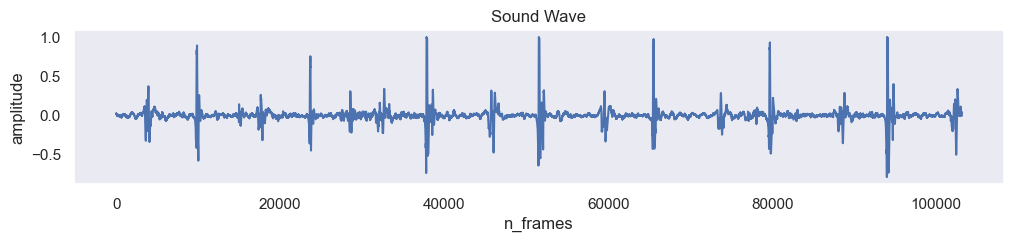

In [52]:
data_index = 0
fig, ax = plt.subplots(1,1,figsize=(12,2))
ax.plot(dataset.dataset[data_index])
ax.set_title('Sound Wave')
ax.set_xlabel('n_frames')
ax.set_ylabel('amplitude')

Some other general information are:
- sample rate is 22050 frame/second
- data class is {'normal', 'murmur', 'extrastole'} 
- class 'murmur' contain subclass {'noisynormal', 'NaN'} 
- class 'normal' contain subclass {'noisymurmur', 'NaN'}
    - subclass *NaN* means not noisy

#### ```Duration```

(0.0, 30.0)

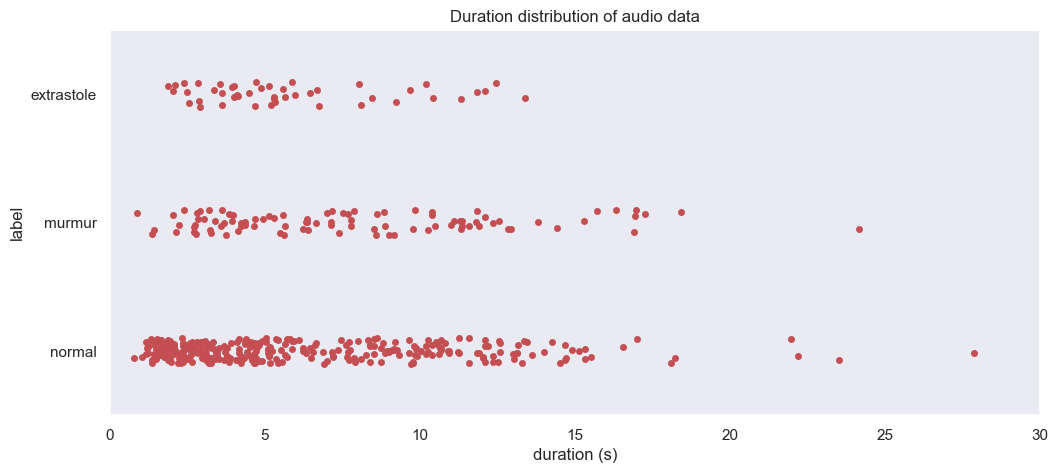

In [38]:
fig = plt.figure(figsize=(12,5))
fig.tight_layout(w_pad=3.0)
sb.set_theme(style="dark")
plt.title('Duration distribution of audio data')
sb.stripplot(dataset.metadata, x='duration', y='label', c= 'r')
plt.xlabel('duration (s)')
plt.xlim([0,30])

(0.0, 2000.0)

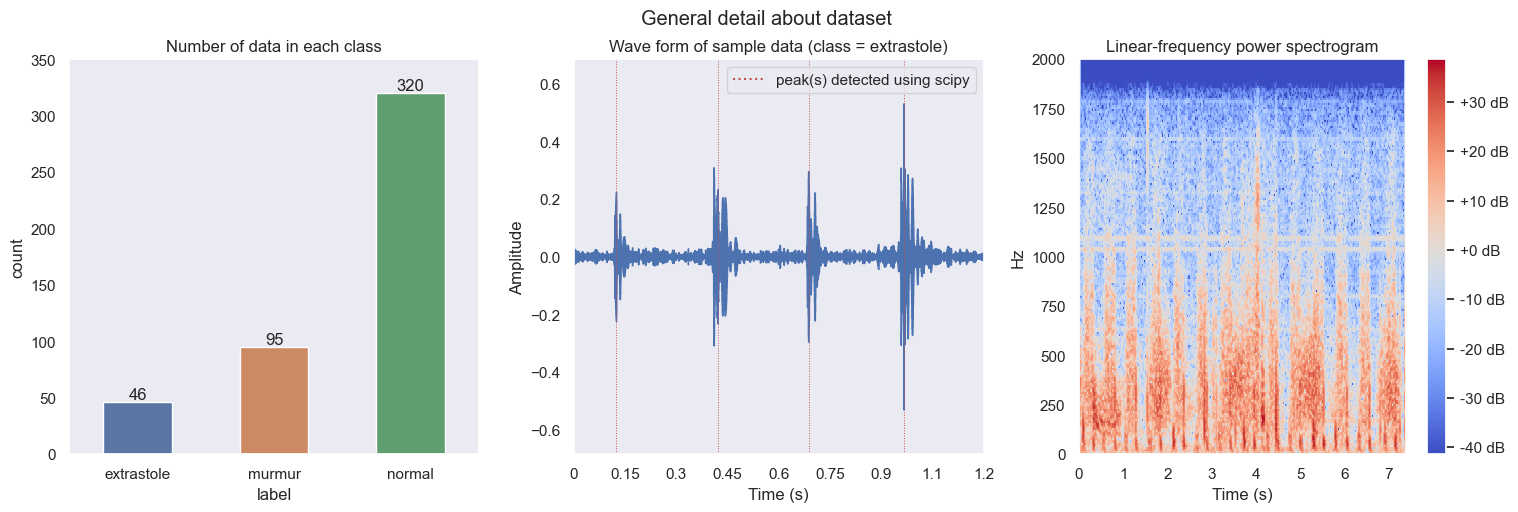

In [29]:
index = 10
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.tight_layout(w_pad=3.0)
fig.suptitle('General detail about dataset')
sb.set_theme(style="dark")
plt.subplots_adjust(top=0.88)
sb.countplot(data_b_path, ax=axes[0], x='label', width=0.5)
axes[0].bar_label(axes[0].containers[0])

librosa.util.peak_pick

# plot number of dataset for each class
axes[0].set_title('Number of data in each class')
axes[0].set_ylim([0, 350])

# plot wave form and peak
peak_array, _ = scipy.signal.find_peaks(dataset.dataset[index], 
                                        height=0.1, distance=0.2*dataset.SR)
dataset.show_wave(index, ax=axes[1])
label = dataset.metadata['label'][index]
for eachpeak in peak_array:
    axes[1].axvline(x = eachpeak/dataset.SR, color = 'r', 
                    ls=":", linewidth=0.7)
axes[1].set_ylabel('Amplitude')
axes[1].set_xlabel('Time (s)')
dummy_line = axes[1].plot([0,0.000001], [0, 0.00001], color='r', ls=':')
axes[1].set_xlim([0.0, 1.2])
axes[1].set_title(f'Wave form of sample data (class = {label})')
axes[1].legend(dummy_line, ["peak(s) detected using scipy"], loc='upper right')

spectrogram = dataset.show_spec(100, ax=axes[2], y_axis='linear', x_axis='time')
fig.colorbar(spectrogram, format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylim([0, 2000])

Note: dB shown in the graph is relative to mean of power (not relative to $10^{-12}$ watt per square metre).

Notice: 
1. number of data in class **'normal'** is a lot more than **'murmur'** and **'extrastole'**. This may cause class imbalance when training the model later, if the dataset is not fed carefully.
2. In the spectrogram (the leftmost figure), there are constant fringe ~0 dB on *Frequency~1000 Hz & ~1100 Hz*. This may be the static noise of the environment/device.

In [5]:
dataset.metadata

,dataset,fname,label,sublabel,bpm,peak-interval,peak-interval-timer,duration
0,b,set_b/extrastole__127_1306764300147_C2.wav,extrastole,NaN,96.235913,"[0.2686167800453515, 0.352562358276644, 0.2744...","[0.1781859410430839, 0.4468027210884354, 0.799...",4.676009
1,b,set_b/extrastole__128_1306344005749_A.wav,extrastole,NaN,90.943461,"[0.2494331065759637, 0.37750566893424037, 0.25...","[0.2770068027210884, 0.5264399092970522, 0.903...",9.236508
2,b,set_b/extrastole__130_1306347376079_D.wav,extrastole,NaN,112.422248,"[0.2529251700680272, 0.26702947845804986, 0.25...","[0.15156462585034014, 0.40448979591836737, 0.6...",4.002766
3,b,set_b/extrastole__134_1306428161797_C1.wav,extrastole,NaN,105.416460,"[0.3017233560090703, 0.28122448979591835, 0.30...","[0.07968253968253969, 0.38140589569161, 0.6626...",2.561270
4,b,set_b/extrastole__138_1306762146980_B.wav,extrastole,NaN,74.039667,"[0.28834467120181406, 0.3871201814058957, 0.29...","[0.3514285714285714, 0.6397732426303855, 1.026...",8.103764
...,...,...,...,...,...,...,...,...
456,b,set_b/normal_noisynormal_284_1311168471850_A.wav,normal,noisynormal,96.614187,"[0.3818140589569161, 0.26099773242630386, 0.53...","[0.1110204081632653, 0.4928344671201814, 0.753...",12.110023
457,b,set_b/normal_noisynormal_284_1311168471850_B.wav,normal,noisynormal,99.657263,"[0.34607709750566895, 0.2582312925170068, 0.36...","[0.14331065759637188, 0.4893877551020408, 0.74...",12.041270
458,b,set_b/normal_noisynormal_285_1311169246969_C.wav,normal,noisynormal,68.588638,"[0.29931972789115646, 0.5092517006802721, 0.29...","[0.2965532879818594, 0.5958730158730159, 1.105...",4.811293
459,b,set_b/normal_noisynormal_296_1311682952647_C.wav,normal,noisynormal,118.700977,"[0.28086167800453515, 0.26988662131519275, 0.3...","[0.22136054421768708, 0.5022222222222222, 0.77...",13.142268


### 2. Beat per minute distribution across different class

Beat per minute is calculated in function ```aproximate_bpm``` in ```utils.dataset```. 
###### The beats (peaks) are detected using ```scipy.signal.find_peaks``` then the intervals between each peak are used to calculate BPM.

Text(0.5, 0.98, 'Distribution of Beat Per Minute (BPM)')

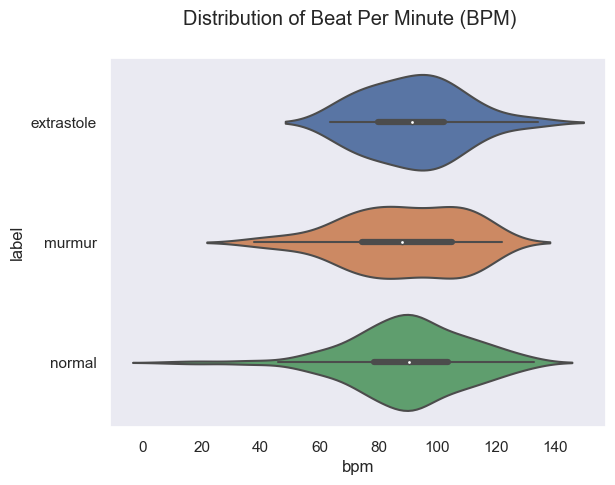

In [6]:
sb.violinplot(data=dataset.metadata, x="bpm", y="label")
plt.plot()

plt.suptitle('Distribution of Beat Per Minute (BPM)')

All 3 class have similar distribution in BPM. Hence, BPM alone may not be a good predictor for classify each heart desease.

## 3. Heart rate variability

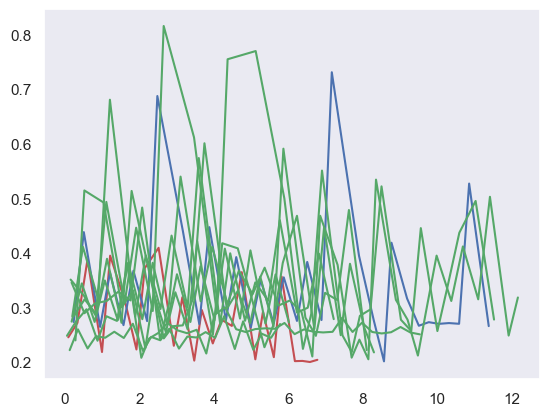

In [7]:
# fig, axes = plt.subplots(5,5, figsize=(10, 10))
# fig.tight_layout(w_pad=1.0)
# fig.suptitle('Plot of HRV')
# sb.set_theme(style="dark")
# plt.subplots_adjust(top=0.95)
for i in range(10):
    index = np.random.randint(len(dataset)-1)
    while dataset.metadata['duration'][index] < 5 or np.amax(dataset.metadata['peak-interval'][index]) > 1.5:
        index = np.random.randint(len(dataset)-1)
    color = 'b'
    if dataset.metadata['label'][index] == 'murmur':
        color = 'r'
    elif dataset.metadata['label'][index] == 'normal':
        color = 'g'
    plt.plot(dataset.metadata['peak-interval-timer'][index], dataset.metadata['peak-interval'][index], color)
    # loop = 0
    # label = dataset.metadata['label'][index]
    # axes[i//5, i%5].plot(dataset.metadata['peak-interval-timer'][index], dataset.metadata['peak-interval'][index])
    # axes[i//5, i%5].set_title(f'{label}')
    # axes[i//5, i%5].set_xlim([0,5])

In [94]:
dataset.metadata['duration'][10]

6.464036281179139

### Denoise static frequency

In [27]:
def fft_denoiser(x, n_components, to_real=True):
    n = len(x)
    fft = np.fft.fft(x, n)
    PSD = fft * np.conj(fft) / n
    _mask = PSD > n_components
    fft = _mask * fft
    clean_data = np.fft.ifft(fft)
    if to_real:
        clean_data = clean_data.real
    
    return clean_data

def stft_denoiser(wave, plot=False):
    noised_data = fft_denoiser(wave, 0.001)
    sos = scipy.signal.butter(1, 250, 'hp', fs=22050, output='sos')
    filtered_noised_data = scipy.signal.sosfilt(sos, noised_data)
    if plot:
        stft = librosa.amplitude_to_db(librosa.stft(wave))
        denoised_stft = librosa.amplitude_to_db(librosa.stft(wave-filtered_noised_data))
        
        fig, axes = plt.subplot_mosaic(
            [
                ["top row", "top row"],
                ["middle row", "middle row"],
                ["bottom left", "bottom right"],
                ["bottom left", "bottom right"],
            ]
        )
        plt.rcParams["figure.figsize"]=(12,10)
        fig.tight_layout(h_pad=1.)
        axes['top row'].plot(wave)
        axes['top row'].set_title('original signal')
        axes['top row'].set_xlabel('n_frames')
        axes['top row'].set_xlim([0,22050*2])
        axes['top row'].set_ylim([-0.5,0.5])
        axes['top row'].set_xticks([], color='w')
        axes['middle row'].plot(wave-filtered_noised_data)
        axes['middle row'].set_title('denoised signal')
        axes['middle row'].set_xlabel('n_frames')
        axes['middle row'].set_xlim([0,22050*2])
        axes['middle row'].set_ylim([-0.5,0.5])
        axes['middle row'].set_xticks([], color='w')
        axes['bottom left'].set_title('original signal in STFT')
        axes['bottom left'].imshow(stft)
        axes['bottom left'].set_ylim([0,200])
        axes['bottom right'].imshow(denoised_stft)
        axes['bottom right'].set_ylim([0,200])
        axes['bottom right'].set_title('denoised signal in STFT')
        plt.show()
    

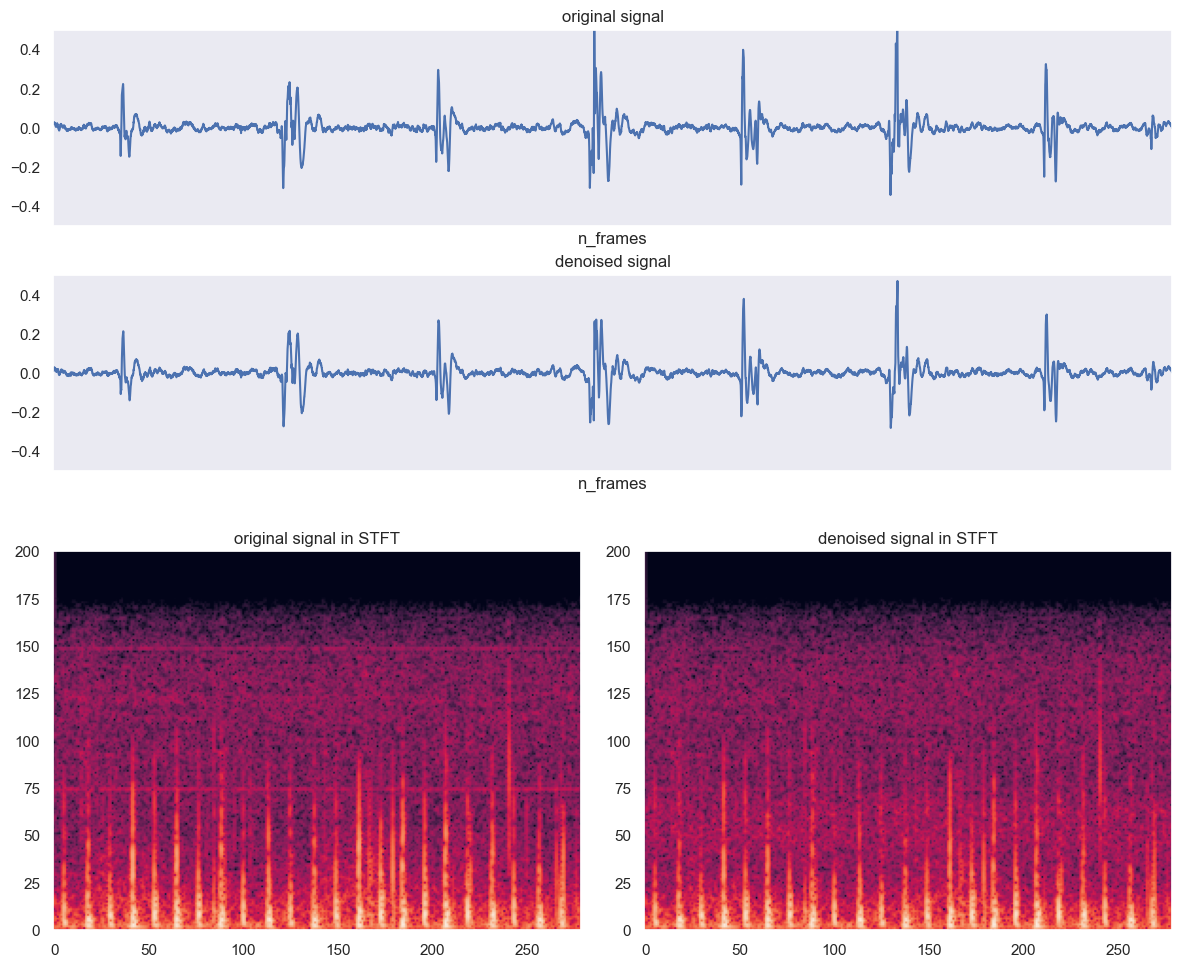

In [28]:
stft_denoiser(dataset.dataset[10], plot=True)